<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-libraries" data-toc-modified-id="Importing-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing libraries</a></span></li><li><span><a href="#Reading-the-dataset" data-toc-modified-id="Reading-the-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Reading the dataset</a></span></li><li><span><a href="#1.-Scatter-plot-for-entire-dataset" data-toc-modified-id="1.-Scatter-plot-for-entire-dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>1. Scatter plot for entire dataset</a></span></li><li><span><a href="#2.-Dividing-dataset-into-training-and-testing" data-toc-modified-id="2.-Dividing-dataset-into-training-and-testing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>2. Dividing dataset into training and testing</a></span><ul class="toc-item"><li><span><a href="#Testing-Dataset" data-toc-modified-id="Testing-Dataset-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Testing Dataset</a></span></li><li><span><a href="#Training-Dataset" data-toc-modified-id="Training-Dataset-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Training Dataset</a></span></li><li><span><a href="#Scatter-plot-for-training-dataset" data-toc-modified-id="Scatter-plot-for-training-dataset-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Scatter plot for training dataset</a></span></li></ul></li><li><span><a href="#3.-Estimating-coefficients-(b0-&amp;-b1)" data-toc-modified-id="3.-Estimating-coefficients-(b0-&amp;-b1)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>3. Estimating coefficients (b0 &amp; b1)</a></span></li><li><span><a href="#4.-Calculating-Y---hat-for-testing-dataset" data-toc-modified-id="4.-Calculating-Y---hat-for-testing-dataset-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>4. Calculating Y - hat for testing dataset</a></span></li><li><span><a href="#5.-Calculating-RMSE" data-toc-modified-id="5.-Calculating-RMSE-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>5. Calculating RMSE</a></span></li><li><span><a href="#6.-Scatter-plot-showing-actual-data-points-and-predicted-data-points" data-toc-modified-id="6.-Scatter-plot-showing-actual-data-points-and-predicted-data-points-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>6. Scatter plot showing actual data points and predicted data points</a></span></li></ul></div>

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection
import math

In [2]:
global train
global test
pd.options.mode.chained_assignment = None

# Reading the dataset

In [3]:
df = pd.read_csv('SwedishInsurance.csv')
display(df)

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
...,...,...
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6


# 1. Scatter plot for entire dataset

Yes, there exists a linear relationship between the variables

In [4]:
x = df['X']
y = df['Y']

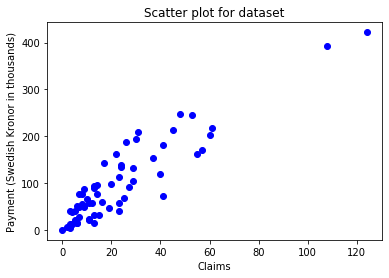

In [5]:
plt.scatter(x,y,c = 'blue')
plt.title('Scatter plot for complete dataset')
plt.xlabel('Claims')
plt.ylabel('Payment (Swedish Kronor in thousands)')
plt.show()

# 2. Dividing dataset into training and testing
Using 80% of the dataset for training and 20% of the dataset for testing

In [6]:
total_rows = df.shape[0]
train_rows = int(total_rows*0.8)
test_rows = total_rows - train_rows 
train, test = sklearn.model_selection.train_test_split(df, train_size=train_rows, test_size=test_rows)

## Testing Dataset

In [7]:
print('Number of rows in the testing dataset : ',test.shape[0])
display(test)

Number of rows in the testing dataset :  13


,X,Y
24,29,103.9
4,40,119.4
32,6,14.6
56,30,194.5
30,0,0.0
5,57,170.9
43,37,152.8
54,8,55.6
27,20,98.1
58,9,87.4


## Training Dataset

In [8]:
print('Number of rows in the training dataset : ',train.shape[0])
display(train)

Number of rows in the training dataset :  50


,X,Y
61,53,244.6
33,5,40.3
11,48,248.1
40,13,89.9
8,45,214.0
28,7,27.9
25,7,77.5
35,11,57.2
57,24,137.9
41,60,202.4


## Scatter plot for training dataset

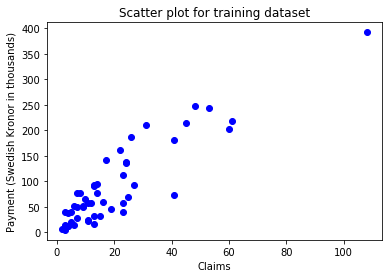

In [9]:
plt.scatter(train['X'],train['Y'],c = 'blue')
plt.title('Scatter plot for training dataset')
plt.xlabel('Claims')
plt.ylabel('Payment (Swedish Kronor in thousands)')
plt.show()

# 3. Estimating coefficients (b0 & b1)

In [10]:
train['X2'] = train['X']*train['X']
train['Y2'] = train['Y']*train['Y']
train['XY'] = train['X']*train['Y']
display(train)

,X,Y,X2,Y2,XY
61,53,244.6,2809,59829.16,12963.8
33,5,40.3,25,1624.09,201.5
11,48,248.1,2304,61553.61,11908.8
40,13,89.9,169,8082.01,1168.7
8,45,214.0,2025,45796.00,9630.0
28,7,27.9,49,778.41,195.3
25,7,77.5,49,6006.25,542.5
35,11,57.2,121,3271.84,629.2
57,24,137.9,576,19016.41,3309.6
41,60,202.4,3600,40965.76,12144.0


In [11]:
train_columns = train.keys()
temp = train.sum(axis = 0, skipna = True)
temp = temp.values.tolist()
t = {}
for i,j in zip(train_columns,temp):
    t[i] = j

In [12]:
b1 = (t['XY'] - (t['X']*t['Y']/train_rows)) / (t['X2'] - (t['X']*t['X']/train_rows))

In [13]:
print('Value of coefficient b1 : ',b1)

Value of coefficient b1 :  3.677738352150587


In [14]:
y_mean = t['Y']/train_rows
x_mean = t['X']/train_rows
b0 = y_mean - b1*x_mean

In [15]:
print('Value of coefficient b0 : ',b0)

Value of coefficient b0 :  15.924787724031262


# 4. Calculating Y - hat for testing dataset

In [16]:
test['y_hat'] = b0 + b1*test['X']

In [17]:
display(test)

,X,Y,y_hat
24,29,103.9,122.579200
4,40,119.4,163.034322
32,6,14.6,37.991218
56,30,194.5,126.256938
30,0,0.0,15.924788
5,57,170.9,225.555874
43,37,152.8,152.001107
54,8,55.6,45.346695
27,20,98.1,89.479555
58,9,87.4,49.024433


# 5. Calculating RMSE

In [18]:
test['LS'] = (test['Y'] - test['y_hat'])**2

In [19]:
print('Least Squares for testing dataset')
display(test['LS'])

Least Squares for testing dataset


24     348.912510
4     1903.954040
32     547.149072
56    4657.115472
30     253.598864
5     2987.264540
43       0.638230
54     105.130273
27      74.312076
58    1472.684151
3     2476.489873
44    3069.203998
55     114.935554
Name: LS, dtype: float64

In [20]:
RMSE = test['LS'].sum()
RMSE = RMSE/test_rows
RMSE = math.sqrt(RMSE)
print('RMSE Value for test dataset : ',RMSE)

RMSE Value for test dataset :  37.222190087033454


# 6. Scatter plot showing actual data points and predicted data points

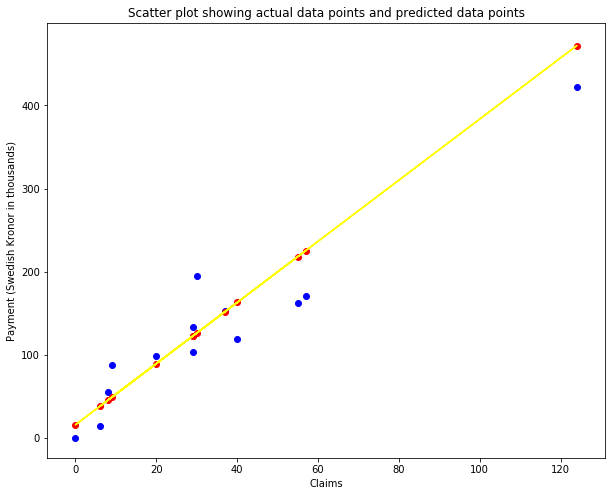

In [21]:
plt.figure(figsize = (10,8))
plt.scatter(test['X'],test['Y'],c = 'blue')
plt.plot(test['X'],test['y_hat'], c = 'yellow')
plt.scatter(test['X'],test['y_hat'], c = 'red')
plt.title('Scatter plot showing actual data points and predicted data points')
plt.xlabel('Claims')
plt.ylabel('Payment (Swedish Kronor in thousands)')
plt.show()